
<img src="https://i.ibb.co/wQg0qzq/Banner.png" width="900" alt="KCode Banner"  />

<a href="https://www.linkedin.com/in/kauebr/"><img src="https://cdn-icons-png.flaticon.com/512/174/174857.png" width="30" ></a> <a href="mailto: kauemandarino@gmail.com"><img src="https://cdn-icons-png.flaticon.com/512/5968/5968534.png" width="30" ></a><a href="
https://api.whatsapp.com/send?phone=5541991835800&text=Oi"> <img src="https://imagepng.org/wp-content/uploads/2017/08/whatsapp-icone-1.png" width="30" ></a><a href="https://github.com/kauebr/"><img src="https://github.githubassets.com/images/modules/logos_page/Octocat.png" width="30" ></a>



# Cotações Financeiras
## Objetivo:
* Obter dados financeiros, referentes as ações das maiores empresas siderúrgicas do mercado brasileiro sendo elas: `Gerdau`, `Vale`, `Usiminas`, `CSN` e `ArcelorMittal`, conforme apontado em nosso estudo do mercado;
* Limpar os dados;
* Plotar gráficos, para verificar visualmente a consistência dos dados;
* Exportar as cotações em formato `.csv`


<h1>Índice</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href=#'a'>Minerando os Dados</a></li>
        <li><a href=#2>Limpeza e Validação dos Dados</a></li>
        <li><a href=#1>Exportando os Dados</a></li>
    *O  redirecionamento automático do índice não funciona no GitHub, para utiliza-lo, baixe o notebook em sua máquina
    </ol>
</div>
<br>
<hr>



Importando bibliotecas

In [28]:
from pandas_datareader import data as web
import pandas as pd
import matplotlib.pyplot as plt
import datetime


## <h2 id="a">Minerando os Dados</h2>

Declarando datas de referência para nossa query, códigos e nomes das empresas na Bovespa. `(Estes valores foram apurados no` [Yahoo Finance](https://finance.yahoo.com/)`)`.


In [79]:
empresas = {'GGBR4.SA': 'Gerdau preferenciais', 'GGBR3.SA': 'Gerdau Metalúrgica preferenciais', 'VALE3.SA': 'Vale', 'USIM5.SA': 'Usiminas',  'CSNA3.SA': 'CSN', 'ARMT34.SA': 'AcelorMittal Brasil'}
tempo_inicial = ('01-01-2016')
tempo_final = datetime.date.today()

Utilizando um for para realizar nossa query

Gerdau preferenciais:


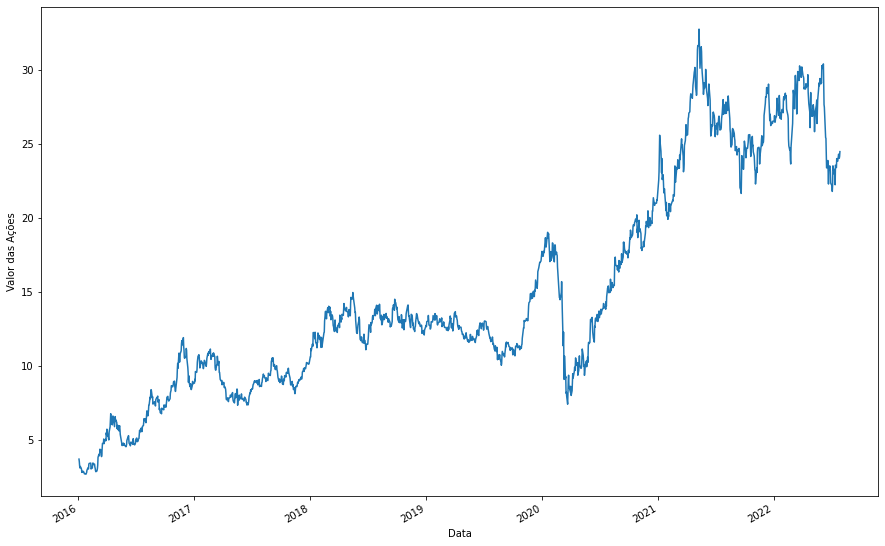

Gerdau Metalúrgica preferenciais:


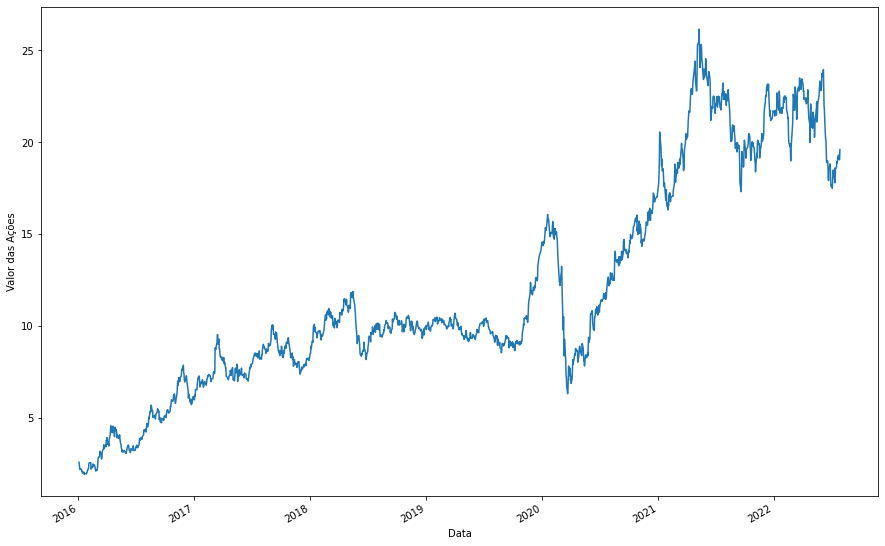

Vale:


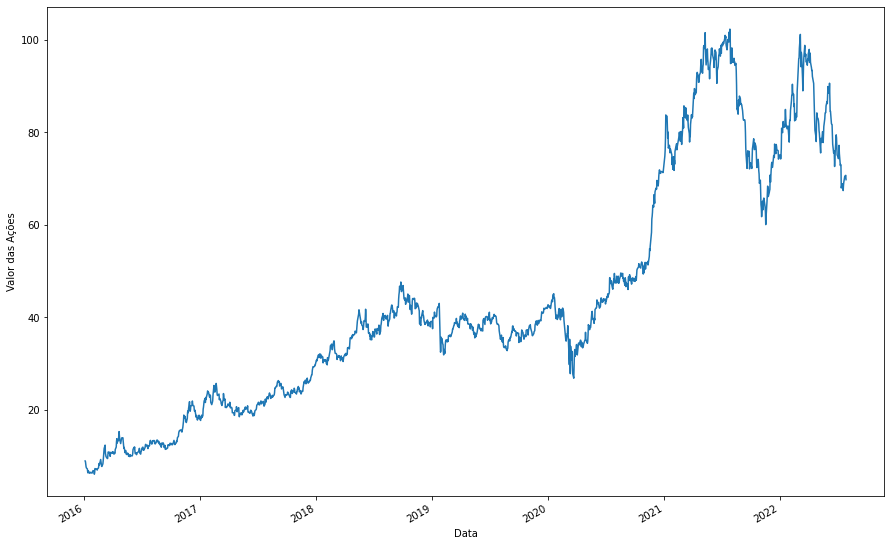

Usiminas:


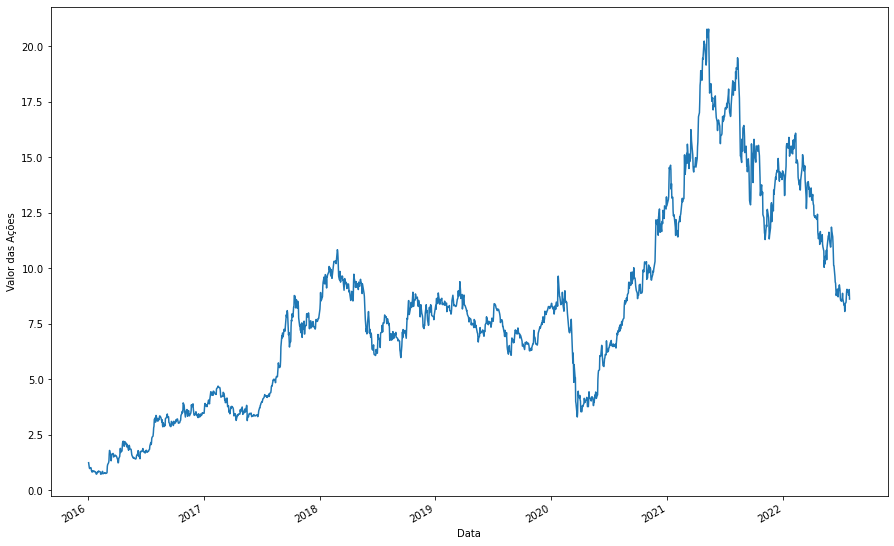

CSN:


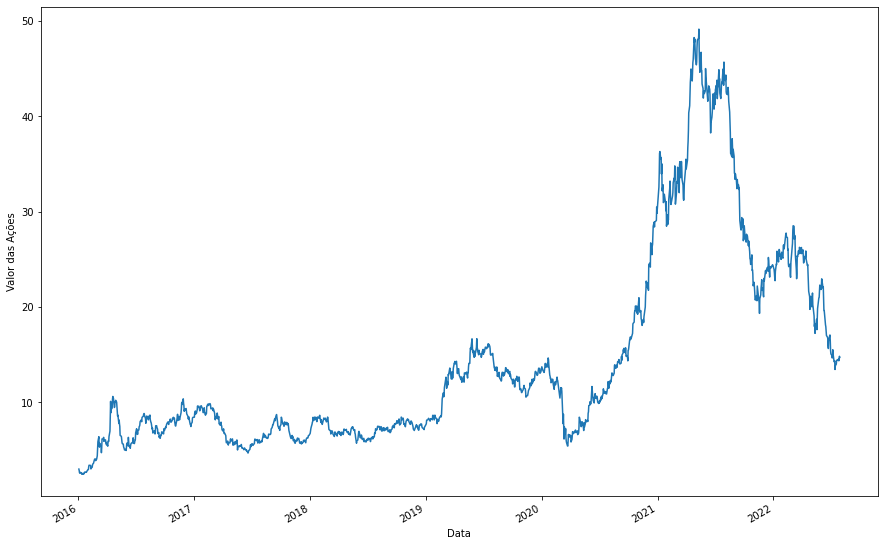

AcelorMittal Brasil:


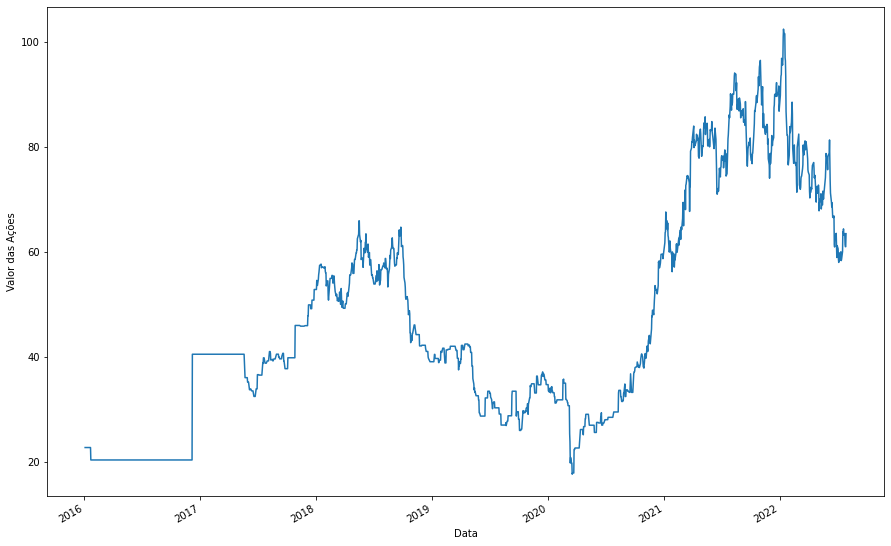

In [80]:
for cod in empresas:
    cotacao = web.DataReader(cod, data_source='yahoo', start=tempo_inicial, end=tempo_final)
    print(f'{empresas[cod]}:')
    cotacao['Adj Close'].plot(figsize=(15, 10)) # Escolhi o parâmetro de fechamento ajustado na fonte de dados.
    plt.xlabel("Data")
    plt.ylabel("Valor das Ações")
    plt.show()

## <h2 id="2">Limpeza e validação dos dados</h2>

Segundo a verificação visual, os valores de 2016 até 2017 da ArcelorMittal estão inconsistentes, vou verificar o que esta acontecendo abaixo.

In [83]:
cotacao = web.DataReader('ARMT34.SA', data_source='yahoo', start=tempo_inicial, end=tempo_final)
cotacao

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,23.550022,23.550022,23.550022,23.550022,0.0,22.683975
2016-01-05,23.550022,23.550022,23.550022,23.550022,0.0,22.683975
2016-01-06,23.550022,23.550022,23.550022,23.550022,0.0,22.683975
2016-01-07,23.550022,23.550022,23.550022,23.550022,0.0,22.683975
2016-01-08,23.550022,23.550022,23.550022,23.550022,0.0,22.683975
...,...,...,...,...,...,...
2022-07-25,63.580002,63.450001,63.580002,63.450001,283.0,63.450001
2022-07-26,63.180000,61.150002,63.180000,61.330002,673.0,61.330002
2022-07-27,61.029999,60.910000,60.990002,60.939999,7.0,60.939999


In [89]:
pd.options.display.max_rows = 365
display(cotacao['Adj Close'][:365])

Date
2016-01-04    22.683975
2016-01-05    22.683975
2016-01-06    22.683975
2016-01-07    22.683975
2016-01-08    22.683975
2016-01-11    22.683975
2016-01-12    22.683975
2016-01-13    22.683975
2016-01-14    22.683975
2016-01-15    22.683975
2016-01-18    22.683975
2016-01-19    22.683975
2016-01-20    22.683975
2016-01-21    22.683975
2016-01-22    20.314440
2016-01-26    20.314440
2016-01-27    20.314440
2016-01-28    20.314440
2016-01-29    20.314440
2016-02-01    20.314440
2016-02-02    20.314440
2016-02-03    20.314440
2016-02-04    20.314440
2016-02-05    20.314440
2016-02-10    20.314440
2016-02-11    20.314440
2016-02-12    20.314440
2016-02-15    20.314440
2016-02-16    20.314440
2016-02-17    20.314440
2016-02-18    20.314440
2016-02-19    20.314440
2016-02-22    20.314440
2016-02-23    20.314440
2016-02-24    20.314440
2016-02-25    20.314440
2016-02-26    20.314440
2016-02-29    20.314440
2016-03-01    20.314440
2016-03-02    20.314440
2016-03-03    20.314440
2016-03-04 

Como podemos observar acima, os dados do Yahoo Finance, referentes a empresa `AcelorMittal`, de 2016 até a metade de 2017, estão se repetindo, como se não houvesse havido alterações no valor das ações neste período. Como a outra fonte de dados, que seria o Google, foi descontinuada, vou retirar estes dados inconsistentes da nossa consulta

Vou repetir a query, excluindo o período inconsistente

Gerdau preferenciais:


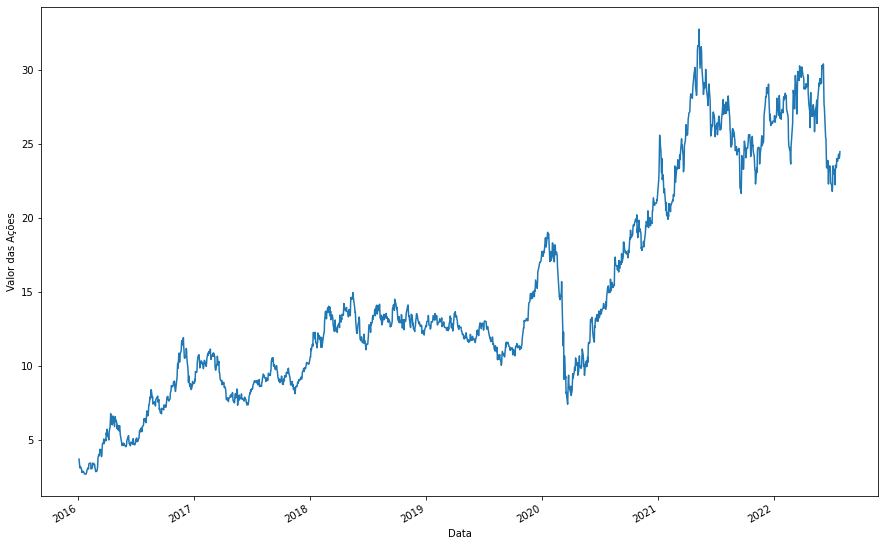

Gerdau Metalúrgica preferenciais:


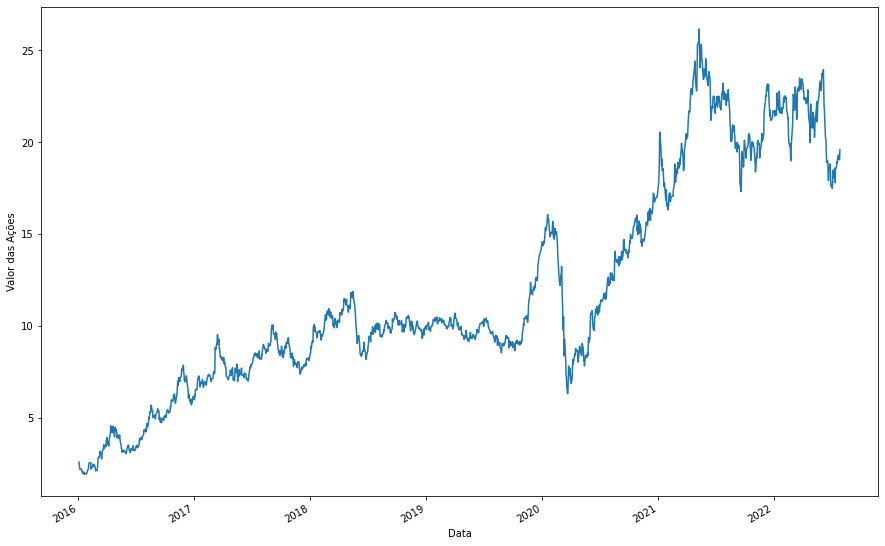

Vale:


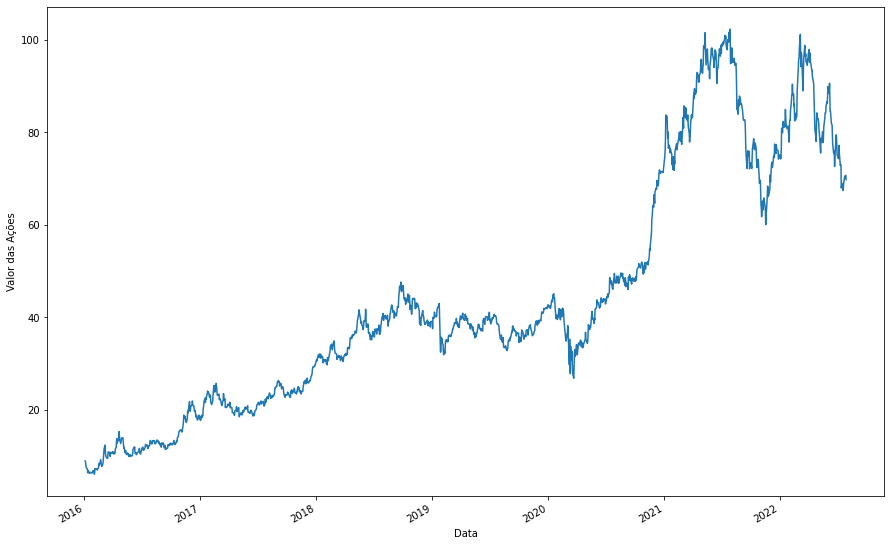

Usiminas:


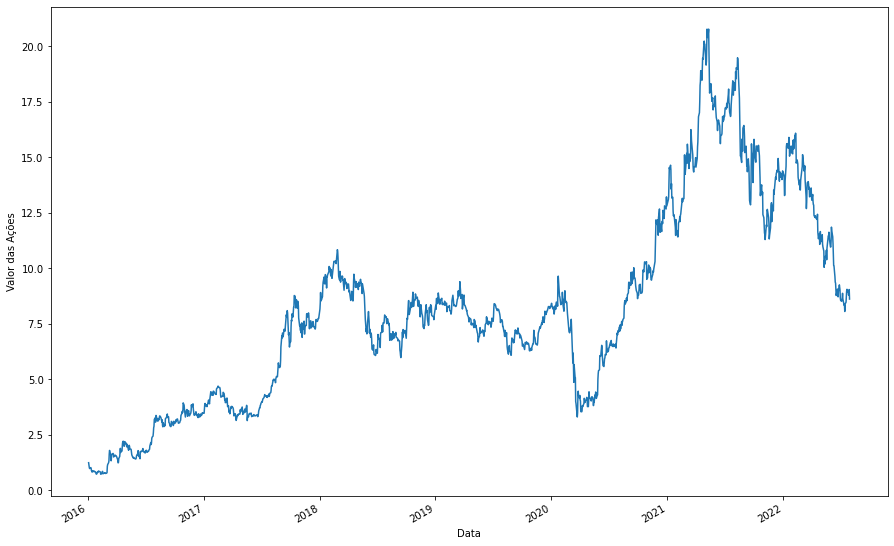

CSN:


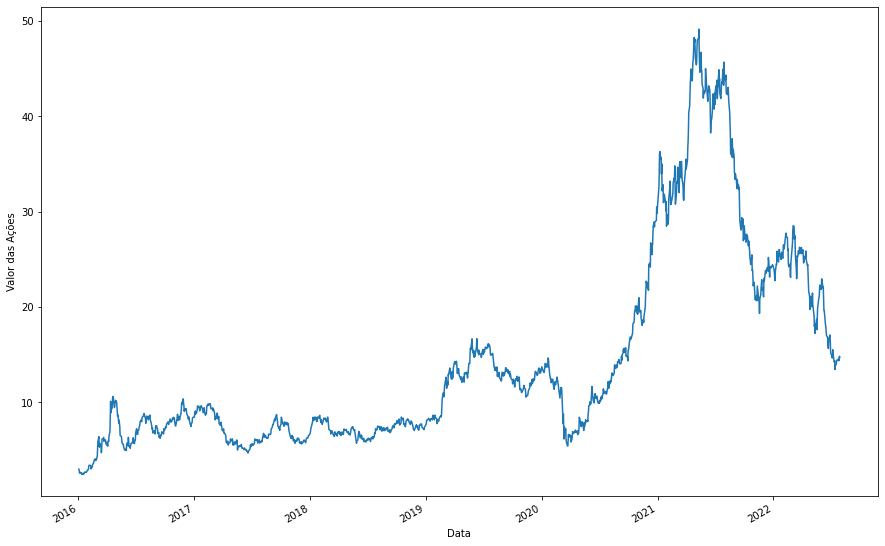

Arcelor Mittal Brasil: 


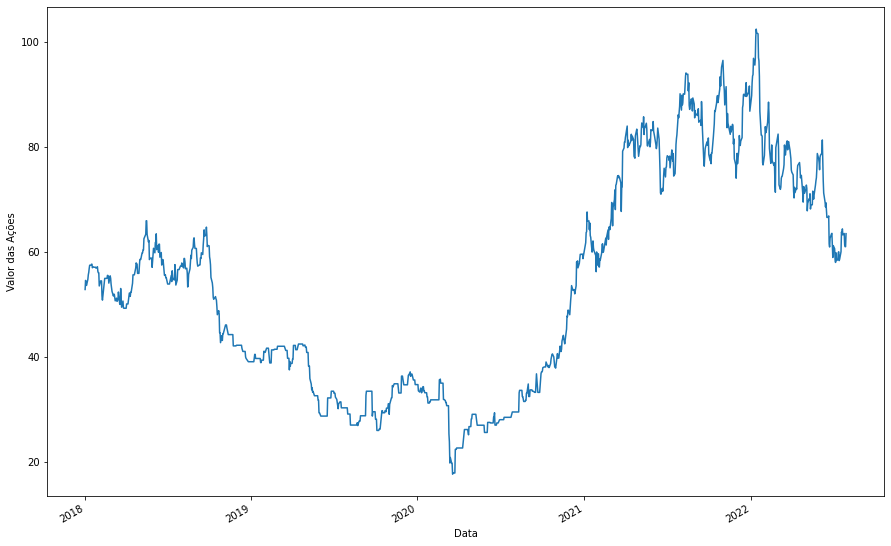

In [92]:
del empresas['ARMT34.SA']


for cod in empresas:
    cotacao = web.DataReader(cod, data_source='yahoo', start=tempo_inicial, end=tempo_final)
    print(f'{empresas[cod]}:')
    cotacao['Adj Close'].plot(figsize=(15, 10))
    plt.xlabel("Data")
    plt.ylabel("Valor das Ações")
    plt.show()
cotacao = web.DataReader('ARMT34.SA', data_source='yahoo', start='01-01-2018', end=tempo_final)
print('Arcelor Mittal Brasil: ') # ArcelorMittal está com período diferente, pois os dados estavam inconsistentes na fonte.
cotacao['Adj Close'].plot(figsize=(15, 10))
plt.xlabel("Data")
plt.ylabel("Valor das Ações")
plt.show()

Agora sim, os valores estão consistentes,
Vou revalidá-los para garantir, desta vez vamos plotar todas as empresas em um gráfico só.

Arcelor Mittal Brasil: 


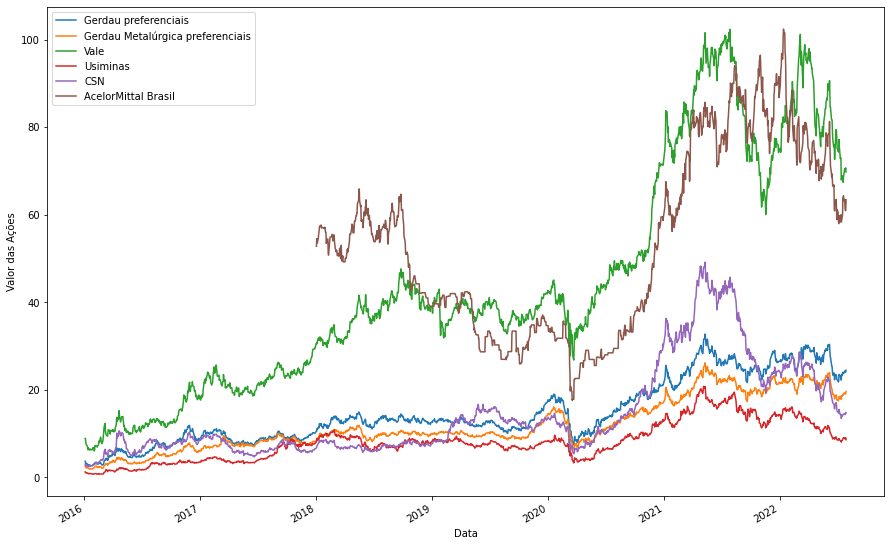

In [93]:
for cod in empresas:
    cotacao = web.DataReader(cod, data_source='yahoo', start=tempo_inicial, end=tempo_final)
    cotacao['Adj Close'].plot(figsize=(15, 10))
    plt.xlabel("Data")
    plt.ylabel("Valor das Ações")    
cotacao = web.DataReader('ARMT34.SA', data_source='yahoo', start='01-01-2018', end=tempo_final)
print('Arcelor Mittal Brasil: ') # ArcelorMittal está com período diferente, pois os dados estavam inconsistentes na fonte.
cotacao['Adj Close'].plot(figsize=(15, 10))
plt.xlabel("Data")
plt.ylabel("Valor das Ações")
plt.legend(['Gerdau preferenciais', 'Gerdau Metalúrgica preferenciais', 'Vale', 'Usiminas', 'CSN', 'AcelorMittal Brasil']) 
plt.show()

> `Dados válidados com sucesso`
<hr>

## <h3 id="3">Exportando os dados</h2>

Uma vez validados os dados, ou exportá-los no formato `.csv`, para poder explorá-los no `PowerBi`.

In [116]:
for cod in empresas:
    cotacao = web.DataReader(cod, data_source='yahoo', start=tempo_inicial, end=tempo_final)
    exp = cotacao['Adj Close']
    exp.to_csv(f'{empresas[cod]}.csv')
cotacao = web.DataReader('ARMT34.SA', data_source='yahoo', start='01-01-2018', end=tempo_final)
exp = cotacao['Adj Close']
exp.to_csv('ArcelorMittal Brasil.csv')

Agora que os dados foram extraídos com sucesso, esta etapa foi concluída
<hr>